In [5]:
!pip install numpy pandas matplotlib imbalanced-learn ipywidgets kagglehub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [ipywidgets]3 [ipywidgets]

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, 
                             precision_score, recall_score, f1_score, 
                             roc_auc_score, roc_curve, precision_recall_curve)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
import kagglehub
import os
import warnings
warnings.filterwarnings('ignore')


CREDIT CARD FRAUD DETECTION MODEL


100%|██████████| 66.0M/66.0M [00:05<00:00, 11.9MB/s]

Extracting files...


Dataset downloaded to: /home/codespace/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3
Found CSV file: /home/codespace/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3/creditcard.csv
Loading data...
Dataset shape: (284807, 31)

Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Fraud percentage: 0.1727%

DATA EXPLORATION

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V

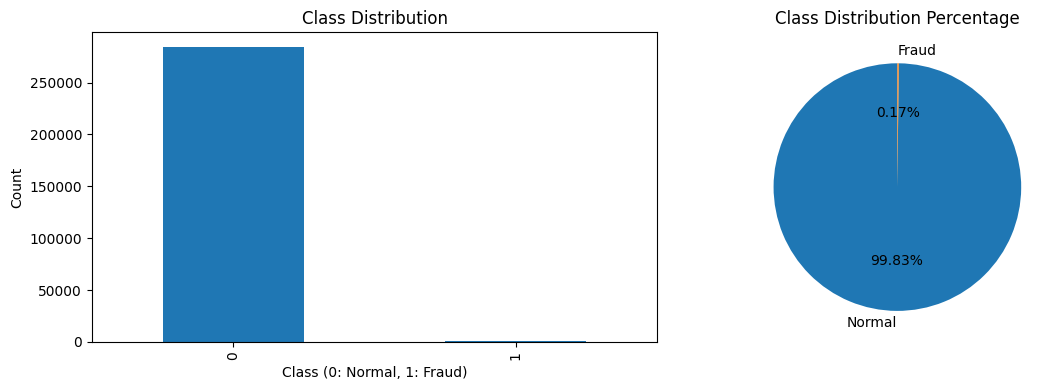


DATA PREPROCESSING

Data normalized successfully
Features shape: (284807, 30)
Target shape: (284807,)

Train set size: 199364
Test set size: 85443

Train fraud cases: 344
Test fraud cases: 148

TRAINING MODELS...

BASELINE MODEL (No Resampling)

Baseline Logistic Regression Results:
--------------------------------------------------
Precision: 0.8585
Recall: 0.6149
F1-Score: 0.7165

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.61      0.72       148

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443


Confusion Matrix:
[[85280    15]
 [   57    91]]

MODEL WITH SMOTE (Oversampling)
After SMOTE - Training samples: 398040
Class distribution: {0: 199020, 1: 199020}

Logistic Regression with SMOTE Results:
--------------------------------------------------
Precis

In [ ]:
class FraudDetectionModel:
    def __init__(self, data_path=None, auto_download=True):
        """
        Initialize the fraud detection model
        
        Parameters:
        -----------
        data_path : str, optional
            Path to the creditcard.csv file. If None and auto_download=True, 
            will download from Kaggle
        auto_download : bool, default=True
            If True, automatically download dataset from Kaggle if data_path is None
        """
        if data_path is None and auto_download:
            print("Downloading dataset from Kaggle...")
            self.data_path = self._download_dataset()
        else:
            self.data_path = data_path
        self.df = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.models = {}
        self.results = {}
    
    def _download_dataset(self):
        """Download dataset from Kaggle using kagglehub"""
        try:
            # Download latest version
            path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
            print(f"Dataset downloaded to: {path}")
            
            # Find the creditcard.csv file
            csv_file = None
            for root, dirs, files in os.walk(path):
                for file in files:
                    if file.endswith('.csv'):
                        csv_file = os.path.join(root, file)
                        print(f"Found CSV file: {csv_file}")
                        break
                if csv_file:
                    break
            
            if csv_file is None:
                raise FileNotFoundError("Could not find creditcard.csv in downloaded dataset")
            
            return csv_file
        except Exception as e:
            print(f"Error downloading dataset: {e}")
            print("Please ensure you have kagglehub installed: pip install kagglehub")
            print("And that you have Kaggle API credentials configured")
            raise
        
    def load_data(self):
        """Load the credit card dataset"""
        print("Loading data...")
        self.df = pd.read_csv(self.data_path)
        print(f"Dataset shape: {self.df.shape}")
        print(f"\nClass distribution:\n{self.df['Class'].value_counts()}")
        print(f"\nFraud percentage: {(self.df['Class'].sum() / len(self.df)) * 100:.4f}%")
        return self.df
    
    def explore_data(self):
        """Perform exploratory data analysis"""
        print("\n" + "="*50)
        print("DATA EXPLORATION")
        print("="*50)
        
        print("\nDataset Info:")
        print(self.df.info())
        
        print("\nMissing values:")
        print(self.df.isnull().sum().sum())
        
        print("\nBasic statistics:")
        print(self.df.describe())
        
        # Visualize class imbalance
        plt.figure(figsize=(12, 4))
        
        plt.subplot(1, 2, 1)
        self.df['Class'].value_counts().plot(kind='bar')
        plt.title('Class Distribution')
        plt.xlabel('Class (0: Normal, 1: Fraud)')
        plt.ylabel('Count')
        
        plt.subplot(1, 2, 2)
        plt.pie(self.df['Class'].value_counts(), labels=['Normal', 'Fraud'], 
                autopct='%1.2f%%', startangle=90)
        plt.title('Class Distribution Percentage')
        
        plt.tight_layout()
        plt.show()
        
    def preprocess_data(self):
        """Preprocess and normalize the data"""
        print("\n" + "="*50)
        print("DATA PREPROCESSING")
        print("="*50)
        
        # Separate features and target
        X = self.df.drop('Class', axis=1)
        y = self.df['Class']
        
        # Normalize Time and Amount columns
        # (V1-V28 are already normalized from PCA)
        scaler = StandardScaler()
        X['Time'] = scaler.fit_transform(X[['Time']])
        X['Amount'] = scaler.fit_transform(X[['Amount']])
        
        print("\nData normalized successfully")
        print(f"Features shape: {X.shape}")
        print(f"Target shape: {y.shape}")
        
        return X, y
    
    def split_data(self, X, y, test_size=0.3):
        """Split data into training and testing sets"""
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=test_size, random_state=42, stratify=y
        )
        
        print(f"\nTrain set size: {len(self.X_train)}")
        print(f"Test set size: {len(self.X_test)}")
        print(f"\nTrain fraud cases: {self.y_train.sum()}")
        print(f"Test fraud cases: {self.y_test.sum()}")
        
        return self.X_train, self.X_test, self.y_train, self.y_test
    
    def train_baseline_model(self):
        """Train baseline model without handling imbalance"""
        print("\n" + "="*50)
        print("BASELINE MODEL (No Resampling)")
        print("="*50)
        
        # Logistic Regression
        lr_baseline = LogisticRegression(max_iter=1000, random_state=42)
        lr_baseline.fit(self.X_train, self.y_train)
        y_pred = lr_baseline.predict(self.X_test)
        
        self.models['Baseline_LR'] = lr_baseline
        self.results['Baseline_LR'] = self.evaluate_model(y_pred, 'Baseline Logistic Regression')
        
    def train_with_smote(self):
        """Train model with SMOTE oversampling"""
        print("\n" + "="*50)
        print("MODEL WITH SMOTE (Oversampling)")
        print("="*50)
        
        # Apply SMOTE
        smote = SMOTE(random_state=42)
        X_train_smote, y_train_smote = smote.fit_resample(self.X_train, self.y_train)
        
        print(f"After SMOTE - Training samples: {len(X_train_smote)}")
        print(f"Class distribution: {pd.Series(y_train_smote).value_counts().to_dict()}")
        
        # Logistic Regression with SMOTE
        lr_smote = LogisticRegression(max_iter=1000, random_state=42)
        lr_smote.fit(X_train_smote, y_train_smote)
        y_pred = lr_smote.predict(self.X_test)
        
        self.models['SMOTE_LR'] = lr_smote
        self.results['SMOTE_LR'] = self.evaluate_model(y_pred, 'Logistic Regression with SMOTE')
        
        # Random Forest with SMOTE
        rf_smote = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
        rf_smote.fit(X_train_smote, y_train_smote)
        y_pred_rf = rf_smote.predict(self.X_test)
        
        self.models['SMOTE_RF'] = rf_smote
        self.results['SMOTE_RF'] = self.evaluate_model(y_pred_rf, 'Random Forest with SMOTE')
        
    def train_with_undersampling(self):
        """Train model with random undersampling"""
        print("\n" + "="*50)
        print("MODEL WITH UNDERSAMPLING")
        print("="*50)
        
        # Apply Random Undersampling
        rus = RandomUnderSampler(random_state=42)
        X_train_rus, y_train_rus = rus.fit_resample(self.X_train, self.y_train)
        
        print(f"After Undersampling - Training samples: {len(X_train_rus)}")
        print(f"Class distribution: {pd.Series(y_train_rus).value_counts().to_dict()}")
        
        # Logistic Regression with Undersampling
        lr_rus = LogisticRegression(max_iter=1000, random_state=42)
        lr_rus.fit(X_train_rus, y_train_rus)
        y_pred = lr_rus.predict(self.X_test)
        
        self.models['Undersampling_LR'] = lr_rus
        self.results['Undersampling_LR'] = self.evaluate_model(y_pred, 'Logistic Regression with Undersampling')
        
    def train_with_class_weight(self):
        """Train model with class weight balancing"""
        print("\n" + "="*50)
        print("MODEL WITH CLASS WEIGHT BALANCING")
        print("="*50)
        
        # Logistic Regression with class weight
        lr_weight = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
        lr_weight.fit(self.X_train, self.y_train)
        y_pred = lr_weight.predict(self.X_test)
        
        self.models['ClassWeight_LR'] = lr_weight
        self.results['ClassWeight_LR'] = self.evaluate_model(y_pred, 'Logistic Regression with Class Weight')
        
        # Random Forest with class weight
        rf_weight = RandomForestClassifier(n_estimators=100, class_weight='balanced', 
                                          random_state=42, n_jobs=-1)
        rf_weight.fit(self.X_train, self.y_train)
        y_pred_rf = rf_weight.predict(self.X_test)
        
        self.models['ClassWeight_RF'] = rf_weight
        self.results['ClassWeight_RF'] = self.evaluate_model(y_pred_rf, 'Random Forest with Class Weight')
        
    def evaluate_model(self, y_pred, model_name):
        """Evaluate model performance"""
        print(f"\n{model_name} Results:")
        print("-" * 50)
        
        # Calculate metrics
        precision = precision_score(self.y_test, y_pred)
        recall = recall_score(self.y_test, y_pred)
        f1 = f1_score(self.y_test, y_pred)
        
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}")
        
        print("\nClassification Report:")
        print(classification_report(self.y_test, y_pred))
        
        print("\nConfusion Matrix:")
        cm = confusion_matrix(self.y_test, y_pred)
        print(cm)
        
        return {
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'confusion_matrix': cm
        }
    
    def compare_models(self):
        """Compare all models"""
        print("\n" + "="*50)
        print("MODEL COMPARISON")
        print("="*50)
        
        comparison_df = pd.DataFrame({
            'Model': list(self.results.keys()),
            'Precision': [self.results[m]['precision'] for m in self.results],
            'Recall': [self.results[m]['recall'] for m in self.results],
            'F1-Score': [self.results[m]['f1_score'] for m in self.results]
        })
        
        print("\n", comparison_df.to_string(index=False))
        
        # Visualize comparison
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        
        metrics = ['Precision', 'Recall', 'F1-Score']
        for idx, metric in enumerate(metrics):
            axes[idx].bar(comparison_df['Model'], comparison_df[metric])
            axes[idx].set_title(f'{metric} Comparison')
            axes[idx].set_ylabel(metric)
            axes[idx].set_xlabel('Model')
            axes[idx].tick_params(axis='x', rotation=45)
            axes[idx].set_ylim([0, 1])
        
        plt.tight_layout()
        plt.show()
        
        # Plot confusion matrices
        n_models = len(self.results)
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        axes = axes.ravel()
        
        for idx, (model_name, results) in enumerate(self.results.items()):
            sns.heatmap(results['confusion_matrix'], annot=True, fmt='d', 
                       cmap='Blues', ax=axes[idx])
            axes[idx].set_title(f'{model_name}\nConfusion Matrix')
            axes[idx].set_ylabel('True Label')
            axes[idx].set_xlabel('Predicted Label')
        
        # Hide extra subplots
        for idx in range(len(self.results), len(axes)):
            axes[idx].axis('off')
        
        plt.tight_layout()
        plt.show()
        
        return comparison_df
    
    def get_best_model(self):
        """Identify the best performing model"""
        best_f1 = 0
        best_model_name = None
        
        for model_name, results in self.results.items():
            if results['f1_score'] > best_f1:
                best_f1 = results['f1_score']
                best_model_name = model_name
        
        print(f"\n{'='*50}")
        print(f"BEST MODEL: {best_model_name}")
        print(f"F1-Score: {best_f1:.4f}")
        print(f"{'='*50}")
        
        return best_model_name, self.models[best_model_name]


# MAIN EXECUTION
if __name__ == "__main__":
    print("="*60)
    print("CREDIT CARD FRAUD DETECTION MODEL")
    print("="*60)
    
    # Initialize model with auto-download from Kaggle
    # Option 1: Auto-download from Kaggle (default)
    fraud_model = FraudDetectionModel(auto_download=True)
    
    # Option 2: Use local file if you already have it
    # fraud_model = FraudDetectionModel(data_path='path/to/creditcard.csv', auto_download=False)
    
    # Load and explore data
    fraud_model.load_data()
    fraud_model.explore_data()
    
    # Preprocess data
    X, y = fraud_model.preprocess_data()
    
    # Split data
    fraud_model.split_data(X, y, test_size=0.3)
    
    # Train different models
    print("\n" + "="*60)
    print("TRAINING MODELS...")
    print("="*60)
    fraud_model.train_baseline_model()
    fraud_model.train_with_smote()
    fraud_model.train_with_undersampling()
    fraud_model.train_with_class_weight()
    
    # Compare models
    comparison_df = fraud_model.compare_models()
    
    # Get best model
    best_model_name, best_model = fraud_model.get_best_model()
    
    print("\n" + "="*60)
    print("MODEL TRAINING COMPLETE!")
    print("="*60)
    print("\nKey Insights:")
    print("1. Dataset automatically downloaded from Kaggle")
    print("2. The dataset is highly imbalanced (~0.17% fraud cases)")
    print("3. Different resampling techniques were applied:")
    print("   - SMOTE (Oversampling minority class)")
    print("   - Random Undersampling (Undersampling majority class)")
    print("   - Class Weight Balancing (Algorithmic approach)")
    print("4. Models evaluated: Logistic Regression & Random Forest")
    print("5. Metrics used: Precision, Recall, F1-Score")
    print("\nRecommendations:")
    print("- For fraud detection, prioritize RECALL (catch all frauds)")
    print("- F1-Score provides a good balance between precision and recall")
    print("- Consider the business cost of false positives vs false negatives")
    print("\nBest Model: {}".format(best_model_name))
    print("This model can now be used for prediction on new transactions!")